In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("Pastel2")


In [2]:
df = pd.read_csv("data/urbansas/annotations/video_annotations.csv")
df.head()

,frame_id,track_id,x,y,w,h,class_id,visibility,label,filename,city,location_id,time,night,subset
0,0,1,526.40,453.05,172.41,98.25,0,1.0,car,rivera0923_00_6,montevideo,rivera0923,0.0,0,mavd
1,0,2,947.42,400.28,38.87,65.35,2,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.0,0,mavd
2,1,1,375.66,444.97,172.41,98.25,0,0.0,car,rivera0923_00_6,montevideo,rivera0923,0.5,0,mavd
3,1,2,947.42,400.28,38.87,65.35,2,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.5,0,mavd
4,2,1,223.58,432.90,172.40,64.60,0,0.0,car,rivera0923_00_6,montevideo,rivera0923,1.0,0,mavd


In [19]:
data_to_use = ""       # set to "" to use the unfiltered version, "_filtered" for filtered
vid_annot = pd.read_csv(f"data/urbansas{data_to_use}/annotations/video_annotations.csv")
aud_annot = pd.read_csv(f"data/urbansas{data_to_use}/annotations/audio_annotations.csv")

# filter vid annot
vid_annot = vid_annot[vid_annot["label"] != -1]
vid_annot = vid_annot[vid_annot["frame_id"] != -1]


'vid_annot = vid_annot[vid_annot["label"] != -1]\nvid_annot = vid_annot[vid_annot["frame_id"] != -1]\n'

In [9]:
vid_annot.head()

,frame_id,track_id,x,y,w,h,class_id,visibility,label,filename,city,location_id,time,night,subset
0,0,1,526.40,453.05,172.41,98.25,0,1.0,car,rivera0923_00_6,montevideo,rivera0923,0.0,0,mavd
1,0,2,947.42,400.28,38.87,65.35,2,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.0,0,mavd
2,1,1,375.66,444.97,172.41,98.25,0,0.0,car,rivera0923_00_6,montevideo,rivera0923,0.5,0,mavd
3,1,2,947.42,400.28,38.87,65.35,2,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.5,0,mavd
4,2,1,223.58,432.90,172.40,64.60,0,0.0,car,rivera0923_00_6,montevideo,rivera0923,1.0,0,mavd


In [12]:
location_id = {}
for i in range(vid_annot.shape[0]):
    row = vid_annot.loc[i]
    if row["location_id"] not in location_id:
        location_id[row["location_id"]] = set()

    location_id[row["location_id"]].add(row["filename"])
    
location_id


{'rivera0923': {'rivera0923_00_0_0',
  'rivera0923_00_10_0',
  'rivera0923_00_12_0',
  'rivera0923_00_14_0',
  'rivera0923_00_15_0',
  'rivera0923_00_16_0',
  'rivera0923_00_18_0',
  'rivera0923_00_1_0',
  'rivera0923_00_20_0',
  'rivera0923_00_21_0',
  'rivera0923_00_22_0',
  'rivera0923_00_23_0',
  'rivera0923_00_28_0',
  'rivera0923_00_4_0',
  'rivera0923_00_9_0',
  'rivera0923_01_12_0',
  'rivera0923_01_13_0',
  'rivera0923_01_14_0',
  'rivera0923_01_15_0',
  'rivera0923_01_16_0',
  'rivera0923_01_18_0',
  'rivera0923_01_19_0',
  'rivera0923_01_1_0',
  'rivera0923_01_20_0',
  'rivera0923_01_21_0',
  'rivera0923_01_22_0',
  'rivera0923_01_23_0',
  'rivera0923_01_25_0',
  'rivera0923_01_26_0',
  'rivera0923_01_27_0',
  'rivera0923_01_28_0',
  'rivera0923_01_2_0',
  'rivera0923_01_3_0',
  'rivera0923_01_4_0',
  'rivera0923_01_5_0',
  'rivera0923_01_6_0',
  'rivera0923_01_8_0',
  'rivera0923_03_0_0',
  'rivera0923_03_11_0',
  'rivera0923_03_12_0',
  'rivera0923_03_13_0',
  'rivera0923_

In [6]:
vid_annot[vid_annot["y"] < 0]

,frame_id,track_id,x,y,w,h,class_id,visibility,label,filename,city,location_id,time,night,count


In [4]:
aud_annot.head()

,filename,class_id,label,non_identifiable_vehicle_sound,start,end
0,rivera0923_03_3_0,0,car,0,0.000,2.125
1,rivera0923_03_3_0,4,offscreen,0,0.000,7.500
2,rivera0923_03_3_0,0,car,0,4.125,7.500
3,rivera0923_01_18_0,2,bus,0,0.000,9.500
4,rivera0923_05_24_0,0,car,0,0.000,7.000


In [16]:
niv = aud_annot[aud_annot["non_identifiable_vehicle_sound"] == 1]
niv["dur"] = niv["end"] - niv["start"]
sum(niv["dur"])

/tmp/ipykernel_78779/466298040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niv["dur"] = niv["end"] - niv["start"]


2295.0055399999997

In [50]:
vid_annot.shape[0]

41743

## Basic Statistics

* Label distribution
   
* Day-Night split
   
* Time distribution
   
* City Distribution
   
* Visibility Split


Text(0.5, 1.0, 'Audio Annotations')

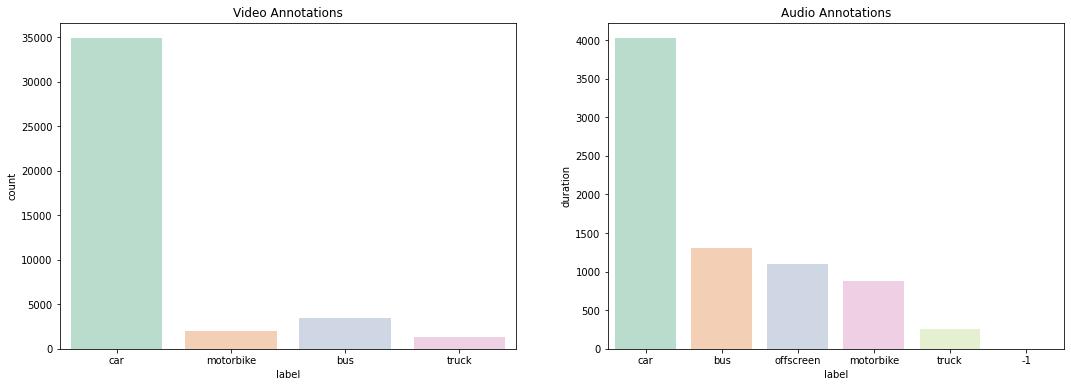

In [51]:
"""
Label Distribution

"""
# get classwise durations for audio annotations
aud_annot["duration"] = aud_annot["end"] - aud_annot["start"]
durations = aud_annot.groupby("label").sum().reset_index()[["label", "duration"]]

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.countplot(x = "label", data = vid_annot, ax = ax[0])
sns.barplot(x = "label", y = "duration",  data = durations, ax = ax[1], 
            order=durations.sort_values('duration', ascending=False).label)
ax[0].set_title("Video Annotations")
ax[1].set_title("Audio Annotations")



## Observations 

Significant imbalance in labels. Cars are overrepresented in both audio and video. However, audio annotations look relatively more balanced. The reason might be multiple cars in one frame. Every car would get its own annotation in the image, but would be not in the audio (get more info on annotations).

<AxesSubplot:xlabel='night', ylabel='count'>

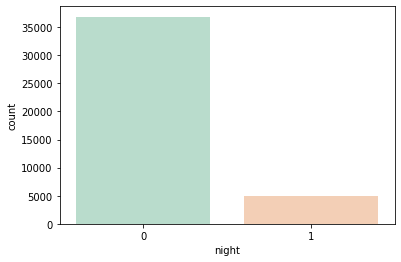

In [52]:
"""
Day-Night split
"""
sns.countplot(x = "night", data=vid_annot)

<AxesSubplot:xlabel='time', ylabel='Count'>

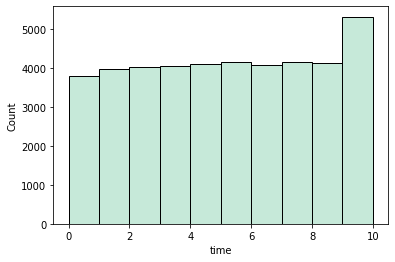

In [53]:
""" 
Time 

"""
sns.histplot(x = "time", data=vid_annot, bins = 10)

<AxesSubplot:xlabel='count', ylabel='city'>

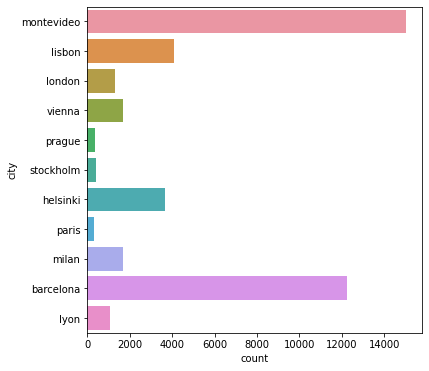

In [54]:
""" 
City Distribution

"""
plt.subplots(figsize = (6, 6))
sns.countplot(y="city", data=vid_annot)

(-1.0, 2.0)

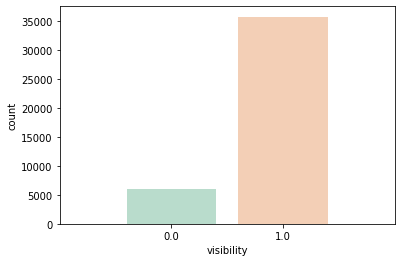

In [56]:
""" 
Visibility

"""

sns.countplot(x="visibility", data=vid_annot)
plt.xlim(-1,2)

In [57]:
""" 
Do all files have both audio and video annotations?
"""
vid_files = set(vid_annot["filename"])
aud_files = set(aud_annot["filename"])

vid_only = [i for i in vid_files if i not in aud_files]
vid_only

"""Yes, all files have both annotations."""

'Yes, all files have both annotations.'

## More Questions

1. How many vehicles per frame? (classwise)
2. Average Speed of vehicles (classwise)
3. How much overlap between audio and video annotations?
   

### 1. How many vehicles per frame? (classwise)

In [21]:
framewise_cts = {"filename":[],"frame_id":[], "car":[], "motorbike":[], "truck":[], "bus":[]}
filenames = sorted(list(set(vid_annot["filename"])))
categories = ["car", "truck", "motorbike", "bus"]
for fname in filenames:
    sub_annot = vid_annot[vid_annot["filename"] == fname]
    for fr in range(max(sub_annot["frame_id"]+1)):
        counts = sub_annot[sub_annot["frame_id"] == fr]["label"].value_counts()
        for category in categories:
            if category in counts:
                framewise_cts[category].append(counts[category])
            else:
                framewise_cts[category].append(0)
        framewise_cts["filename"].append(fname)
        framewise_cts["frame_id"].append(fr)


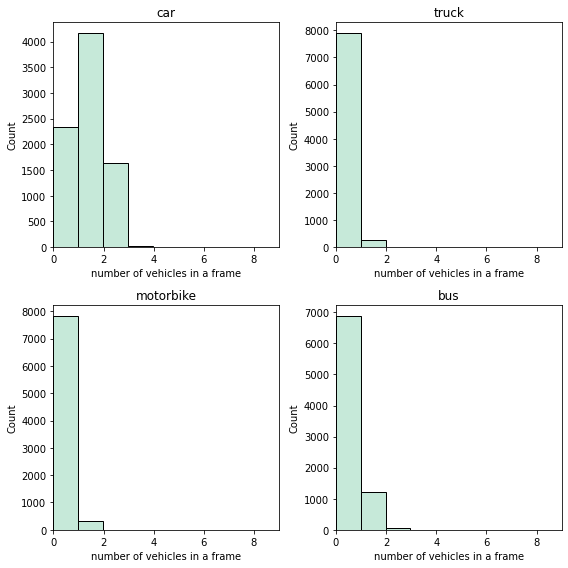

In [23]:
plt.figure(figsize = (8, 8))
for i in range(4):
    category = categories[i]
    cts = np.array(framewise_cts[category])
    cts = cts[(cts>=0) & (cts<10)]                         # don't plot 0s and values greater than 10
    plt.subplot(2, 2, i+1)
    sns.histplot(cts, binwidth=0.99)
    plt.title(category)
    plt.xlabel("number of vehicles in a frame")
    plt.xlim(0, 9)
plt.tight_layout()


### There are frames with upto 4 trucks. Let's take a look at those

In [60]:
# get the filename with maximum number for each category
print("Files with maximum numbers of instances for the following categories:")
for category in categories:
    max_idx = np.argmax(framewise_cts[category])
    fname = framewise_cts["filename"][max_idx]
    print(f"{category} - {fname}")
    


Files with maximum numbers of instances for the following categories:
car - street_traffic-barcelona-163-4994
truck - street_traffic-barcelona-163-4975
motorbike - street_traffic-barcelona-161-4915
bus - street_traffic-helsinki-165-5050


In [61]:
print("Files with minimum numbers of instances for the following categories:")
for category in categories:
    max_idx = np.argmin(framewise_cts[category])
    fname = framewise_cts["filename"][max_idx]
    print(f"{category} - {fname}")

Files with minimum numbers of instances for the following categories:
car - acevedo0103_00_0
truck - acevedo0103_00_0
motorbike - acevedo0103_00_0
bus - acevedo0103_00_0


In [62]:
vid_annot_sub = vid_annot[vid_annot.filename == "rivera0923_00_6"].set_index("frame_id")
vid_annot_sub

,track_id,x,y,w,h,class_id,visibility,label,filename,city,location_id,time,night
frame_id,,,,,,,,,,,,,
1,1,526.40,453.05,172.41,98.25,1,1.0,car,rivera0923_00_6,montevideo,rivera0923,0.0,0
1,2,947.42,400.28,38.87,65.35,4,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.0,0
2,3,1928.46,400.66,212.64,143.32,1,1.0,car,rivera0923_00_6,montevideo,rivera0923,0.5,0
2,1,375.66,444.97,172.41,98.25,1,0.0,car,rivera0923_00_6,montevideo,rivera0923,0.5,0
2,2,947.42,400.28,38.87,65.35,4,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2,947.42,400.28,38.87,65.35,4,1.0,motorbike,rivera0923_00_6,montevideo,rivera0923,9.0,0
20,5,3.20,365.20,121.60,99.10,3,0.0,bus,rivera0923_00_6,montevideo,rivera0923,9.5,0
20,9,212.47,464.03,193.33,118.37,1,0.0,car,rivera0923_00_6,montevideo,rivera0923,9.5,0


In [3]:
vid_annot["frame_num"] = vid_annot["time"]*20
vid_annot.head()

,frame_id,track_id,x,y,w,h,class_id,visibility,label,filename,city,location_id,time,night,count,frame_num
2,0,1,1018.70,450.51,261.21,155.95,1,1.0,car,rivera0923_03_3_0,montevideo,rivera0923,0.5,0,0.0,10.0
3,0,2,303.86,426.44,128.70,71.96,1,0.0,car,rivera0923_03_3_0,montevideo,rivera0923,0.5,0,0.0,10.0
4,1,2,302.37,426.30,128.70,71.96,1,0.0,car,rivera0923_03_3_0,montevideo,rivera0923,1.0,0,0.0,20.0
5,2,2,300.88,426.17,128.70,71.96,1,0.0,car,rivera0923_03_3_0,montevideo,rivera0923,1.5,0,0.0,30.0
6,3,2,299.40,426.03,128.70,71.96,1,0.0,car,rivera0923_03_3_0,montevideo,rivera0923,2.0,0,0.0,40.0


In [47]:
df = pd.read_csv("data/urbansas/annotations/audio_annotations.csv")
df.head()

,filename,class_id,label,non_identifiable_vehicle_sound,start,end
0,barcelona161_4901,0,car,0,0.294,3.106
1,barcelona161_4901,1,bus,0,6.648,9.961
2,barcelona161_4902,0,car,0,7.877,9.836
3,barcelona161_4902,0,car,0,4.752,7.273
4,barcelona161_4903,-1,-1,1,-1.000,-1.000


In [46]:
import re
s='barcelona1234'


['barcelona', '1234']

In [57]:
# fix filenames 
from pathlib import Path
import glob
import os 

files = glob.glob("data/urbansas/audio/*.wav")
files = [Path(f).stem for f in files]
done = set()
for i, fname in enumerate(df["filename"]):
    if fname in done:
        continue

    print(fname)
    
    done.add(fname)

    if fname not in files:
        print(fname)
        """parts = fname.split("_")
        loc_id = parts.pop(0)
        city = re.split('(\d+)',s)[0]
        parts = [loc_id[:len(city)], loc_id[len(city):]] + parts
        parts = ["street_traffic"] + parts
        print(parts)
        correct_fname = ("-").join(parts)

        fname = "data/urbansas/audio/" + fname + ".wav"
        correct_fname = "data/urbansas/audio/" + correct_fname + ".wav"

        os.rename(correct_fname, fname)
"""



1621
barcelona161_4901
barcelona161_4902
barcelona161_4903
barcelona161_4904
barcelona161_4905
barcelona161_4906
barcelona161_4907
barcelona161_4908
barcelona161_4909
barcelona161_4910
barcelona161_4911
barcelona161_4912
barcelona161_4913
barcelona161_4914
barcelona161_4915
barcelona161_4916
barcelona161_4917
barcelona161_4918
barcelona161_4919
barcelona161_4920
barcelona161_4921
barcelona161_4922
barcelona161_4923
barcelona161_4924
barcelona161_4925
barcelona161_4926
barcelona161_4927
barcelona161_4928
barcelona161_4929
barcelona161_4930
barcelona161_4931
barcelona161_4932
barcelona161_4933
barcelona161_4934
barcelona161_4935
barcelona161_4936
barcelona162_4937
barcelona162_4938
barcelona162_4939
barcelona162_4940
barcelona162_4941
barcelona162_4942
barcelona162_4943
barcelona162_4944
barcelona162_4945
barcelona162_4946
barcelona162_4947
barcelona162_4948
barcelona162_4949
barcelona162_4950
barcelona162_4951
barcelona162_4952
barcelona162_4953
barcelona162_4954
barcelona162_4955
barce

In [54]:
df.filename

0       barcelona161_4901
1       barcelona161_4901
2       barcelona161_4902
3       barcelona161_4902
4       barcelona161_4903
              ...        
1952      milan1202_44638
1953    stockholm175_5400
1954       lyon1045_41938
1955      milan1202_44384
1956      milan1202_44996
Name: filename, Length: 1957, dtype: object

In [60]:
df.filename = correct_fnames
df.to_csv("data/urbansas/annotations/video_annotations.csv", index = None)

In [59]:
correction

{'lisbon1076_42303': 'street_traffic-lisbon-1076-42303',
 'lisbon1067_42550': 'street_traffic-lisbon-1067-42550',
 'london167_5118': 'street_traffic-london-167-5118',
 'london167_5127': 'street_traffic-london-167-5127',
 'vienna176_5437': 'street_traffic-vienna-176-5437',
 'lisbon1008_40464': 'street_traffic-lisbon-1008-40464',
 'prague1153_41096': 'street_traffic-prague-1153-41096',
 'vienna178_5508': 'street_traffic-vienna-178-5508',
 'lisbon1008_40974': 'street_traffic-lisbon-1008-40974',
 'london167_5122': 'street_traffic-london-167-5122',
 'stockholm175_5384': 'street_traffic-stockholm-175-5384',
 'vienna177_5449': 'street_traffic-vienna-177-5449',
 'lisbon1008_43876': 'street_traffic-lisbon-1008-43876',
 'helsinki164_5028': 'street_traffic-helsinki-164-5028',
 'lisbon1067_43273': 'street_traffic-lisbon-1067-43273',
 'helsinki165_5057': 'street_traffic-helsinki-165-5057',
 'stockholm174_5341': 'street_traffic-stockholm-174-5341',
 'lisbon1067_41681': 'street_traffic-lisbon-1067-41

In [67]:
# fix audio filenames
df_audio = pd.read_csv("data/urbansas/annotations/audio_annotations.csv")
files = glob.glob("data/urbansas/audio/*.wav")
files = [Path(f).stem for f in files]
correct_fnames = []
for i, fname in enumerate(df_audio["filename"]):
    if fname not in correction:
        correct_fnames.append(fname)
    else:
        print(correction[fname])
        correct_fnames.append(correction[fname])
        if correction[fname] not in files:
            print("Your code sucks!")


street_traffic-barcelona-161-4901
street_traffic-barcelona-161-4901
street_traffic-barcelona-161-4902
street_traffic-barcelona-161-4902
street_traffic-barcelona-161-4903
street_traffic-barcelona-161-4904
street_traffic-barcelona-161-4905
street_traffic-barcelona-161-4906
street_traffic-barcelona-161-4906
street_traffic-barcelona-161-4906
street_traffic-barcelona-161-4907
street_traffic-barcelona-161-4908
street_traffic-barcelona-161-4909
street_traffic-barcelona-161-4909
street_traffic-barcelona-161-4909
street_traffic-barcelona-161-4910
street_traffic-barcelona-161-4910
street_traffic-barcelona-161-4911
street_traffic-barcelona-161-4911
street_traffic-barcelona-161-4911
street_traffic-barcelona-161-4912
street_traffic-barcelona-161-4913
street_traffic-barcelona-161-4914
street_traffic-barcelona-161-4915
street_traffic-barcelona-161-4915
street_traffic-barcelona-161-4916
street_traffic-barcelona-161-4916
street_traffic-barcelona-161-4917
street_traffic-barcelona-161-4917
street_traffic

In [62]:
df_audio.filename = correct_fnames
df_audio.to_csv("data/urbansas/annotations/audio_annotations.csv", index = None)

In [58]:
from pathlib import Path
import glob

vid_filenames = set(vid_annot["filename"].unique())
aud_filenames = set(aud_annot["filename"].unique())

vid_files = glob.glob("data/urbansas/video/video_8fps_audio_merged/*.mp4")
vid_files = set([Path(f).stem for f in vid_files])

aud_files = glob.glob("data/urbansas/audio/*.wav")
aud_files = set([Path(f).stem for f in aud_files])


set()